In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import axes3d
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

A = [-200, -100, -170, 15]
a = [-1, -1, -6.5, 0.7]
b = [0, 0, 11, 0.6]
c = [-10, -10, -6.5, 0.7]
xbar1 = [1, 0, -0.5, -1]
xbar2 = [0, 0.5, 1.5, 1]
xmin = -1.5
xmax = 1.5
ymin = -0.5
ymax = 2
stepRate = math.pow(10, -10)
stepSize = (abs(xmin) + abs(xmax)) * stepRate

In [2]:
def Vx(x1, x2, A, a, b, C, xbar1, xbar2):
    return np.sum([
        A[i] * np.exp((a[i] * (x1 - xbar1[i])**2) + (b[i] * (x1 - xbar1[i])) *
                      (x2 - xbar2[i]) + C[i] * (x2 - xbar2[i])**2)
        for i in range(len(A))
    ])


def move_new(x1, x2, mut_size, max_mut=1):

    x1_lst, x2_lst, new_score = [], [], []
    x_tups = np.array([(1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1),
                       (0, 1), (1, 1)])

    x_tup = get_coors(x1, x2, mut_size)

    new_x = (x_tups * x_tup) + (x1, x2)
    new_score = [Vx(x[0], x[1], A, a, b, c, xbar1, xbar2) for x in new_x]
    return new_score.index(min(new_score)), new_x[new_score.index(
        min(new_score))], min(new_score)


def get_coors(x1, x2, mut_size):

    new_x1 = abs(np.random.normal(0, mut_size, 1)[0])
    new_x2 = abs(np.random.normal(0, mut_size, 1)[0])
    qiv = 1.96 * mut_size

    if -qiv < new_x1 < qiv and -qiv < new_x2 < qiv:
        return new_x1, new_x2
    return get_coors(x1, x2, mut_size)


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)
    return answer


def mp_hillclimber(n_it, n_p, climb_scheme="Hillclimb"):
    if climb_scheme == "simAn": scheme = getScheme_data(n_it)
    xcoords = np.linspace(-0.85, 0.5, n_p)
    ycoords = np.linspace(1.35, 0.0, n_p)
    coords = [(x, y) for x, y in zip(xcoords, ycoords)]
    cur_coords = coords
    cur_scores = [Vx(x[0], x[1], A, a, b, c, xbar1, xbar2) for x in coords]
    cur_score = np.mean(cur_scores)
    coors_list = {"x": [xcoords], "y": [ycoords], "z": [cur_scores]}
    for i in range(n_it):
        new_coors, new_score = [], []
        for x1, x2 in cur_coords:
            new = move_new(x1, x2, mut_size=0.05)
            new_coors.append(new[1])
            new_score.append(new[2])
        if np.mean(new_score) < cur_score:
            cur_score = np.mean(new_score)
            cur_coords = new_coors
            coors_list["x"].append(list(np.array(new_coors)[:, 0]))
            coors_list["y"].append(list(np.array(new_coors)[:, 1]))
            coors_list["z"].append(new_score)
        elif climb_scheme == "simAn":
            if scheme[i] > np.random.uniform():
                cur_score = np.mean(new_score)
                cur_coords = new_coors
                coors_list["x"].append(list(np.array(new_coors)[:, 0]))
                coors_list["y"].append(list(np.array(new_coors)[:, 1]))
                coors_list["z"].append(new_score)
    return coors_list


data = mp_hillclimber(100, 20)
print(len(data), len(data["x"]), len(data["x"][0]))

3 20 20


In [3]:
X = np.linspace(xmin, xmax, 200)
Y = np.linspace(ymin, ymax, 200)
Z = []

for x1 in X:
    temp = []
    for y1 in Y:
        V = Vx(x1, y1, A, a, b, c, xbar1, xbar2)
        if V > 100:
            temp.append(0)
        else:
            temp.append(V)
    Z.append(temp)

X = np.array([X for x in X])
Y = np.array([np.repeat(np.array([y]), len(Y)) for y in Y])
Z = np.array(Z)

In [4]:
def showPlot(i=0):
    contours = plt.contour(X, Y, Z, 4, colors='black')
    plt.clabel(contours, inline=True, fontsize=8)

    plt.imshow(
        Z,
        extent=[np.min(X), np.max(X),
                np.min(Y), np.max(Y)],
        origin='lower',
        cmap='RdGy',
        alpha=0.7)
    plt.colorbar()
    for j in range(len(data["x"][i])):
        plt.scatter(data["x"][i][j], data["y"][i][j], c="b")


y = interactive(showPlot, i=(0, len(data["x"]) - 1, 1))
display(y)

interactive(children=(IntSlider(value=0, description='i', max=19), Output()), _dom_classes=('widget-interact',…

<IPython.core.display.Javascript object>


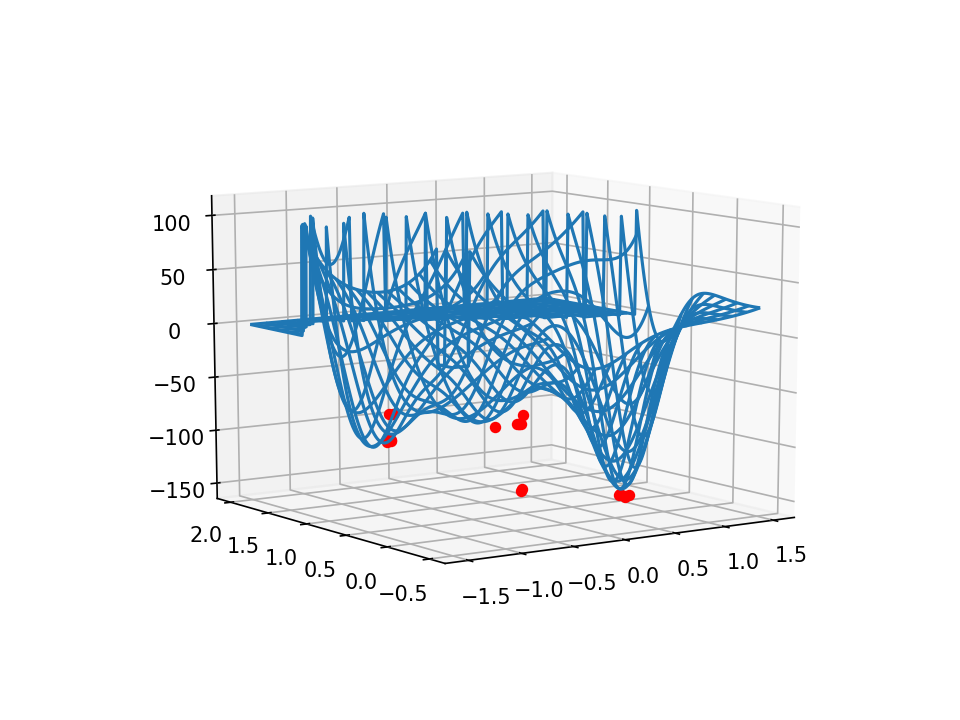

In [21]:
%matplotlib notebook
i = 12
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
for j in range(len(data["x"][0])):
    ax.scatter(data["x"][i][j], 
                data["y"][i][j], 
                data["z"][i][(len(data["z"][0])-1)-j], 
                c="red")
plt.show()

In [6]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]